# Similaridade na atividade neural dos diferentes tempos
### Medida através da matriz de confusão
- Foram selecionadas as tentativas com $\textbf{duração > 1300ms}$
- A atividade foi convolucionada com kernel gaussiano de $\sigma_{kernel}=100$ms.
- Os últimos 300ms das tentativas foram descartados, para diminuir a influência da ação motora.
- A atividade foi dividida em 20 bins de 50ms

### As medidas
- Para cada trial, um classificador SVM foi treinado deixando de fora essa trial, e testado nela


In [91]:
import pickle
from spikeHelper.similarities import temporalGeneralization
from spikeHelper.dataOrganization import XyTfromEpoch, trialToXyT,getX,normRows
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd

---

## Rato 7

In [9]:
rat = 8
data = pickle.load(open('Data/r'+str(rat)+'_bin50_sigma100.pickle','rb'))
data = XyTfromEpoch(data,getBins=[10,36])[:,:20,:]
print('Number of neurons',data.shape[0])
print('Number of times',data.shape[1])
print('Number of trials',data.shape[2])
nTrials=50
beg = trialToXyT(data[:,:,:nTrials])
end = trialToXyT(data[:,:,-nTrials:])

Number of neurons 37
Number of times 20
Number of trials 537


In [ ]:
def generalization(rat)
    data = pickle.load(open('Data/r'+str(rat)+'_bin50_sigma100.pickle','rb'))
    data = XyTfromEpoch(data,getBins=[10,36])[:,:20,:]
    beg = trialToXyT(data[:,:,:nTrials])
    end = trialToXyT(data[:,:,-nTrials:])
    

    parameters = loadBestParams(rat)
    clf = SVC(C=parameters['C'], gamma=10**parameters['logGamma'], decision_function_shape='ovo')
    sim = temporalGeneralization(getX(beg), beg['y'], beg['trial'], clf)

In [17]:
isinstance(clf,SVC)

True

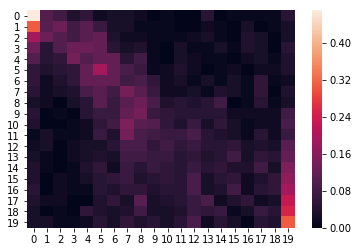

In [112]:
normalize=0
nTrials=100
beg = trialToXyT(data[:,:,:nTrials])
end = trialToXyT(data[:,:,-nTrials:])
allt = trialToXyT(data)

#plt.subplot(1,3,1)

clf = SVC(C=parameters['C'], gamma=10**parameters['logGamma'], decision_function_shape='ovo')
sim = temporalGeneralization(getX(beg), beg['y'], beg['trial'], clf)
if normalize:
    sim = normRows(sim)
sns.heatmap(sim)
# nao testar e treinar no mesmo. talvez esteja acontecendo

In [ ]:
from spikeHelper.metrics import performanceFromConfusion
cross = pd.DataFrame(columns=['confusion'],index = ['Rat 7','Rat 8','Rat 9', 'Rat 10'])
for rat in [7,8,9,10]:
    cross['confusion']['Rat '+str(rat)], _ = crossGeneralization(beg,end,rat)

In [113]:
cross.applymap(lambda x: performanceFromConfusion(x,'kappa'))

,confusion
Rat 7,0.277454
Rat 8,0.266578
Rat 9,0.241716
Rat 10,0.246235


In [115]:
timeWarpingResults = pd.DataFrame(columns=['confusion','readout'],index = ['Rat 7','Rat 8','Rat 9', 'Rat 10'])
for rat in [7,8,9,10]:
    timeWarpingResults['confusion']['Rat '+str(rat)], timeWarpingResults['readout']['Rat '+str(rat)] = crossGeneralization(beg,end,rat)
timeWarpingResults

,confusion,readout
Rat 7,"[[[1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0...","[[13.2675900763, 11.7648130103, 10.1361345986,..."
Rat 8,"[[[1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0...","[[13.0854872951, 11.6823562951, 10.1734092394,..."
Rat 9,"[[[1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0...","[[13.6201889412, 12.4608479879, 10.7633092331,..."
Rat 10,"[[[1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0...","[[13.4011972407, 12.038451556, 10.435835554, 8..."
